In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
path = "/Users/adriannapinzariu/Desktop/LIDC_newMode_2022 (1).csv"

In [3]:
df = pd.read_csv(path)

In [4]:
# Drop non-numeric columns
df = df.select_dtypes(include=['float', 'int'])

# Drop rows with NaN values
df = df.dropna()

In [5]:
import umap.umap_ as umap

In [8]:
# Load the data and extract the features and target variable
X_with_id = df
y = (df['Malignancy']).to_numpy()
X = X_with_id.drop(['noduleID', 'Malignancy'], axis = 1)
print(X.columns)

# Scale the features
scaler = StandardScaler()
scaler.fit(X)

# Apply UMAP for dimensionality reduction
X = scaler.transform(X)
pca = umap.UMAP()
X = pca.fit_transform(X)

Index(['Subtlety', 'InternalStructure', 'Calcification', 'Sphericity',
       'Margin', 'Lobulation', 'Spiculation', 'Texture', 'InstanceID',
       'RadiologistID',
       ...
       'Correlation', 'Energy', 'Homogeneity', 'Entropy', 'x_3rdordermoment',
       'Inversevariance', 'Sumaverage', 'Variance', 'Clustertendency',
       'MaxProbability'],
      dtype='object', length=115)


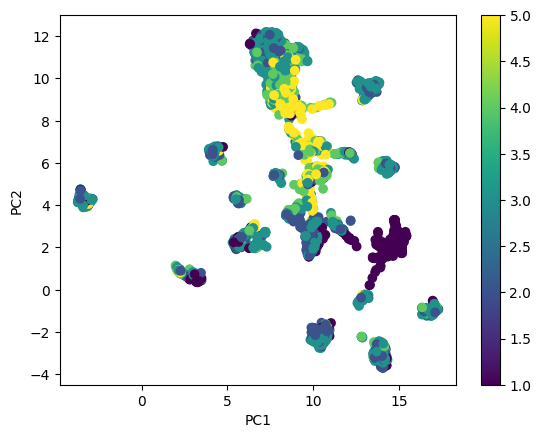

In [7]:
# Display the PCA plot colored by malignancy rating
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()